In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.datasets import make_regression

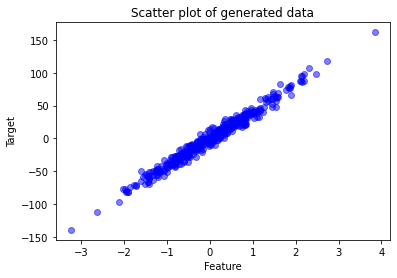

In [17]:
X, y = make_regression(n_samples=400, n_features=1,n_informative=1, noise=6, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.scatter(X, y, color='blue', alpha=0.5)
plt.title('Scatter plot of generated data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#y_pred = lr.predict(X_test)
score = lr.score(X_test, y_test)
print(f"Model score: {score:.2f}")



Model score: 0.98


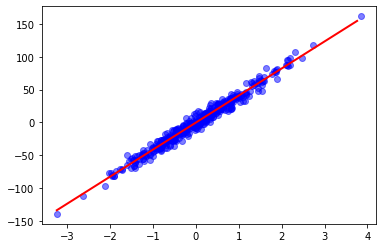

In [ ]:
_x_range = np.arange(X.min(), X.max(), 0.1).reshape(-1, 1) # Create a range of values for prediction
#-1 , 1 means that the array is reshaped to have 1 column and as many rows as needed
y_pred = lr.predict(_x_range)

plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(_x_range, y_pred, color='red', linewidth=2)
plt.show()

In [3]:
df = pd.read_csv('Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
one_hot = pd.get_dummies(df['Species'])
raw_df = df.drop('Species', axis=1) 
df = raw_df.join(one_hot)
df

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


In [5]:
#normalize the data 
scaler = MinMaxScaler()
df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']] = scaler.fit_transform(df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']])
df

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978,True,False,False,False,False,False,False
1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235,True,False,False,False,False,False,False
2,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279,True,False,False,False,False,False,False
3,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365,True,False,False,False,False,False,False
4,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.007394,0.077670,0.069091,0.077703,0.021012,0.048771,False,False,False,False,False,True,False
155,0.008121,0.081553,0.072727,0.079392,0.040723,0.031208,False,False,False,False,False,True,False
156,0.007394,0.089320,0.083636,0.084459,0.031842,0.029347,False,False,False,False,False,True,False
157,0.011939,0.110680,0.107273,0.108108,0.066424,0.143719,False,False,False,False,False,True,False


In [6]:
# Split the data into features and target variable
X = df.drop(['Length1'], axis=1)  # Drop target columns
y = df[['Length1']]  # Target columns
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
ler = LinearRegression()
ler.fit(X_train, y_train)

score = ler.score(X_test, y_test)
print(f"Model score: {score:.2f}")

Model score: 1.00


In [8]:
from sklearn.linear_model import SGDRegressor

In [ ]:
lr_sgd = SGDRegressor(max_iter=1000, tol=1e-3) #max_iter is the number of iterations, tol is the tolerance for stopping criteria
lr_sgd.fit(X_train, y_train.values.ravel())

y_pred_sgd = lr_sgd.predict(X_test)
score_sgd = lr_sgd.score(X_test, y_test)
print(f"SGD Model score: {score_sgd:.2f}")


SGD Model score: 0.85
